In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import scipy.stats as stats
import pandas_profiling   #need to install using anaconda prompt (pip install pandas_profiling)

%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True

from matplotlib.backends.backend_pdf import PdfPages

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA   

In [4]:
import os

In [5]:
os.chdir(r"D:\Training\Imarticus\PGA\PGA14\week12")

In [6]:
# reading data into dataframe
telco= pd.read_csv("telco_csv.csv")

In [3]:
telco.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,...,callwait,forward,confer,longmon,tollmon,equipmon,cardmon,wiremon,ebill,custcat
0,2,13,44,1,9,64,4,5,0,0,...,0,1,0,3.70,0.00,0.0,7.50,0.0,0,1
1,3,11,33,1,7,136,5,5,0,0,...,1,1,1,4.40,20.75,0.0,15.25,35.7,0,4
2,3,68,52,1,24,116,1,29,0,1,...,1,0,1,18.15,18.00,0.0,30.25,0.0,0,3
3,2,33,33,0,12,33,2,0,0,1,...,0,0,0,9.45,0.00,0.0,0.00,0.0,0,1
4,2,23,30,1,9,30,1,2,0,0,...,0,1,1,6.30,0.00,0.0,0.00,0.0,0,3


In [7]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   region    1000 non-null   int64  
 1   tenure    1000 non-null   int64  
 2   age       1000 non-null   int64  
 3   marital   1000 non-null   int64  
 4   address   1000 non-null   int64  
 5   income    1000 non-null   int64  
 6   ed        1000 non-null   int64  
 7   employ    1000 non-null   int64  
 8   retire    1000 non-null   int64  
 9   gender    1000 non-null   int64  
 10  reside    1000 non-null   int64  
 11  tollfree  1000 non-null   int64  
 12  equip     1000 non-null   int64  
 13  callcard  1000 non-null   int64  
 14  wireless  1000 non-null   int64  
 15  multline  1000 non-null   int64  
 16  voice     1000 non-null   int64  
 17  pager     1000 non-null   int64  
 18  internet  1000 non-null   int64  
 19  callid    1000 non-null   int64  
 20  callwait  1000 non-null   int64

In [8]:
# pandas_profiling.ProfileReport(telco)

In [6]:
#!pip install autoviz

In [7]:
#from autoviz.AutoViz_Class import AutoViz_Class

In [9]:
telco_new = pd.get_dummies(telco, columns=['region', "custcat"], drop_first=True) #one hot encoding

In [11]:
# telco_new.isnull().sum()

In [10]:
# #Handling missings - Method2
# def Missing_imputation(x):
#     x = x.fillna(x.median())
#     return x

# telco_new=telco_new.apply(lambda x: Missing_imputation(x))

In [13]:
# #Handling Outliers - Method2
# def outlier_capping(x):
#     x = x.clip_upper(x.quantile(0.99))
#     x = x.clip_lower(x.quantile(0.01))
#     return x

# telco_new=telco_new.apply(lambda x: outlier_capping(x))

In [14]:
telco_new.columns

Index(['tenure', 'age', 'marital', 'address', 'income', 'ed', 'employ',
       'retire', 'gender', 'reside', 'tollfree', 'equip', 'callcard',
       'wireless', 'multline', 'voice', 'pager', 'internet', 'callid',
       'callwait', 'forward', 'confer', 'longmon', 'tollmon', 'equipmon',
       'cardmon', 'wiremon', 'ebill', 'region_2', 'region_3', 'custcat_2',
       'custcat_3', 'custcat_4'],
      dtype='object')

In [15]:
# telco_new.drop(['wireless', 'equip'],axis=1, inplace=True)

In [16]:
telco_new.columns

Index(['tenure', 'age', 'marital', 'address', 'income', 'ed', 'employ',
       'retire', 'gender', 'reside', 'tollfree', 'equip', 'callcard',
       'wireless', 'multline', 'voice', 'pager', 'internet', 'callid',
       'callwait', 'forward', 'confer', 'longmon', 'tollmon', 'equipmon',
       'cardmon', 'wiremon', 'ebill', 'region_2', 'region_3', 'custcat_2',
       'custcat_3', 'custcat_4'],
      dtype='object')

In [17]:
telco_new

,tenure,age,marital,address,income,ed,employ,retire,gender,reside,...,tollmon,equipmon,cardmon,wiremon,ebill,region_2,region_3,custcat_2,custcat_3,custcat_4
0,13,44,1,9,64,4,5,0,0,2,...,0.00,0.00,7.50,0.0,0,1,0,0,0,0
1,11,33,1,7,136,5,5,0,0,6,...,20.75,0.00,15.25,35.7,0,0,1,0,0,1
2,68,52,1,24,116,1,29,0,1,2,...,18.00,0.00,30.25,0.0,0,0,1,0,1,0
3,33,33,0,12,33,2,0,0,1,1,...,0.00,0.00,0.00,0.0,0,1,0,0,0,0
4,23,30,1,9,30,1,2,0,0,4,...,0.00,0.00,0.00,0.0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,10,39,0,0,27,3,0,0,1,3,...,0.00,29.05,0.00,0.0,1,0,1,0,0,0
996,7,34,0,2,22,5,5,0,1,1,...,0.00,25.60,0.00,0.0,0,0,0,0,0,0
997,67,59,0,40,944,5,33,0,1,1,...,32.00,54.55,35.75,65.8,1,0,1,0,0,1
998,70,49,0,18,87,2,22,0,1,1,...,33.50,0.00,25.25,0.0,0,0,1,0,1,0


In [18]:
# variable reduction (feature selection/Feature engineering) - PCA - principle component analysis
sc = StandardScaler()

In [19]:
std_model = sc.fit(telco_new)

In [20]:
std_model

StandardScaler()

In [21]:
telco_scaled = pd.DataFrame(std_model.transform(telco_new), columns = telco_new.columns)

In [22]:
pca_model = PCA()

In [23]:
pca_model = pca_model.fit(telco_scaled)

In [24]:
pca_model.explained_variance_  #eigen values

array([7.26891652, 5.3337865 , 3.37299902, 1.83354374, 1.53347548,
       1.21743971, 1.19047857, 1.06964092, 1.00404351, 0.87496413,
       0.70374752, 0.66365473, 0.62735799, 0.60187487, 0.53394758,
       0.49358312, 0.46921751, 0.46392931, 0.42497528, 0.40742414,
       0.37308754, 0.35862143, 0.34704188, 0.32851721, 0.30137508,
       0.25233117, 0.23128707, 0.21535235, 0.19502003, 0.16049793,
       0.08329603, 0.06843184, 0.02917334])

In [25]:
pd.DataFrame(pca_model.explained_variance_).to_csv("Eigen.csv")

In [26]:
pd.DataFrame(pca_model.explained_variance_ratio_).to_csv("Variance.csv")

In [27]:
pca_model.explained_variance_ratio_

array([0.22004993, 0.16146826, 0.10210988, 0.05550637, 0.04642248,
       0.03685522, 0.03603903, 0.03238095, 0.03039514, 0.02648755,
       0.02130436, 0.02009064, 0.01899184, 0.01822039, 0.01616405,
       0.01494211, 0.01420449, 0.01404441, 0.01286516, 0.01233384,
       0.01129438, 0.01085645, 0.0105059 , 0.00994511, 0.00912345,
       0.00763875, 0.00700169, 0.0065193 , 0.00590379, 0.00485871,
       0.0025216 , 0.00207162, 0.00088316])

In [24]:
np.cumsum(pca_model.explained_variance_ratio_)  #Eigen values

array([0.21817291, 0.37232245, 0.47912291, 0.53824677, 0.58756923,
       0.62718459, 0.66476965, 0.69877302, 0.73064224, 0.75664878,
       0.77749424, 0.79797531, 0.81804724, 0.8362829 , 0.85194405,
       0.86726919, 0.88108291, 0.89455397, 0.90676164, 0.91888427,
       0.93035522, 0.94103182, 0.95078734, 0.9598819 , 0.96758521,
       0.97506239, 0.98195115, 0.9882641 , 0.99434093, 0.99782379,
       1.        ])

In [28]:
pca_model = PCA(n_components=10)

pca_model = pca_model.fit(telco_scaled)

In [29]:
PCs = pd.DataFrame(pca_model.transform(telco_scaled), columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10' ])

In [30]:
PCs

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-2.238853,-0.133470,-0.994174,0.334864,1.504013,0.602181,-0.347895,-0.895290,0.889083,-0.657161
1,3.440784,-0.658991,-2.465123,1.852436,-1.301908,2.092432,0.051303,-1.149825,0.624815,1.087894
2,0.130468,4.312259,0.081211,0.442119,-1.589390,0.392858,0.444316,0.335689,-0.441921,-1.196112
3,-3.445031,-0.444685,-0.894138,-1.104409,1.542052,0.579968,-0.437082,-0.379491,-1.322613,0.343149
4,-1.903138,0.764361,-2.943644,1.280794,1.608203,0.089232,0.189026,0.705428,1.230053,-0.070943
...,...,...,...,...,...,...,...,...,...,...
995,-2.700349,-2.820874,-0.881692,-1.031713,-1.439978,0.523253,-0.117053,0.856323,-0.402841,-0.793340
996,-2.781223,-2.435025,-0.858433,-1.546982,0.002505,0.021829,0.355116,0.526462,-0.648611,-0.703219
997,6.969287,0.888895,4.788910,-2.946049,-1.352657,2.625881,4.990585,-1.236012,-0.242549,-1.454422
998,1.359872,4.009531,-0.464491,-0.866542,-1.761378,-0.764538,0.388689,-0.135190,-0.983426,-0.441292


In [31]:
#variable reduction
Loadings =  pd.DataFrame((pca_model.components_.T * np.sqrt(pca_model.explained_variance_)).T,columns=telco_new.columns).T

In [32]:
Loadings.column= ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10' ]

<ipython-input-32-d83596615e52>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  Loadings.column= ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10' ]


In [33]:
Loadings.to_csv('loadings.csv')

In [31]:
#PCA can be used for any type of business problem (regressin, classificaiton, segmentation)
selected_vars = ['tollmon',
'voice',
'employ',
'internet',
'multline',
'reside',
'region_2',
'income',
'retire',
'gender'
]

In [32]:
#Build the segmentation using two ways 
#1. Using PC's 2. Using selected variables from each PC's

final_input_segmentation = telco_scaled[selected_vars]

In [33]:
km_3 = KMeans(n_clusters=3, random_state=123)
km_3 = km_3.fit(final_input_segmentation)

In [34]:
km_3.cluster_centers_

array([[ 0.41809243, -0.24459759,  1.23057267, -0.54247977,  0.11397234,
        -0.6364108 ,  0.05873579, -0.46685987,  4.50295411,  0.24273609],
       [-0.30758618, -0.63088542, -0.08312745, -0.22877904, -0.18335818,
        -0.02022509,  0.02676994, -0.11176818, -0.22207644, -0.03401967],
       [ 0.60098287,  1.40476205, -0.01208578,  0.5802674 ,  0.37937817,
         0.14318295, -0.06715809,  0.3150009 , -0.22207644,  0.03578813]])

In [35]:
km_3.labels_

array([1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 0, 1, 1, 1, 2,
       1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2,
       2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1,
       2, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1,
       1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2,
       0, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 0, 1, 1,
       2, 0, 1, 1, 1, 0, 1, 1, 2, 2, 1, 1, 2, 1, 0,

In [36]:
km_4 = KMeans(n_clusters=4, random_state=123).fit(final_input_segmentation)
km_5 = KMeans(n_clusters=5, random_state=123).fit(final_input_segmentation)
km_6 = KMeans(n_clusters=6, random_state=123).fit(final_input_segmentation)
km_7 = KMeans(n_clusters=7, random_state=123).fit(final_input_segmentation)
km_8 = KMeans(n_clusters=8, random_state=123).fit(final_input_segmentation)

In [37]:
telco_new

,tenure,age,marital,address,income,ed,employ,retire,gender,reside,...,tollmon,equipmon,cardmon,wiremon,ebill,region_2,region_3,cust_cat_2,cust_cat_3,cust_cat_4
0,13,44.0,1,9,64.00,4,5.0,0,0,2,...,0.00,0.00,7.50,0.0,0,1,0,0,0,0
1,11,33.0,1,7,136.00,5,5.0,0,0,6,...,20.75,0.00,15.25,35.7,0,0,1,0,0,1
2,68,52.0,1,24,116.00,1,29.0,0,1,2,...,18.00,0.00,30.25,0.0,0,0,1,0,1,0
3,33,33.0,0,12,33.00,2,0.0,0,1,1,...,0.00,0.00,0.00,0.0,0,1,0,0,0,0
4,23,30.0,1,9,30.00,1,2.0,0,0,4,...,0.00,0.00,0.00,0.0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,10,39.0,0,0,27.00,3,0.0,0,1,3,...,0.00,29.05,0.00,0.0,1,0,1,0,0,0
996,7,34.0,0,2,22.00,5,5.0,0,1,1,...,0.00,25.60,0.00,0.0,0,0,0,0,0,0
997,67,59.0,0,40,460.48,5,33.0,0,1,1,...,32.00,54.55,35.75,65.8,1,0,1,0,0,1
998,70,49.0,0,18,87.00,2,22.0,0,1,1,...,33.50,0.00,25.25,0.0,0,0,1,0,1,0


In [38]:
telco_new['cluster_3'] = km_3.labels_
telco_new['cluster_4'] = km_4.labels_
telco_new['cluster_5'] = km_5.labels_
telco_new['cluster_6'] = km_6.labels_
telco_new['cluster_7'] = km_7.labels_
telco_new['cluster_8'] = km_8.labels_

In [39]:
telco_new

,tenure,age,marital,address,income,ed,employ,retire,gender,reside,...,region_3,cust_cat_2,cust_cat_3,cust_cat_4,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8
0,13,44.0,1,9,64.00,4,5.0,0,0,2,...,0,0,0,0,1,1,3,0,4,5
1,11,33.0,1,7,136.00,5,5.0,0,0,6,...,1,0,0,1,2,1,1,3,2,1
2,68,52.0,1,24,116.00,1,29.0,0,1,2,...,1,0,1,0,1,2,0,1,5,2
3,33,33.0,0,12,33.00,2,0.0,0,1,1,...,0,0,0,0,1,1,4,0,4,2
4,23,30.0,1,9,30.00,1,2.0,0,0,4,...,0,0,1,0,1,1,3,0,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,10,39.0,0,0,27.00,3,0.0,0,1,3,...,1,0,0,0,1,1,4,1,2,2
996,7,34.0,0,2,22.00,5,5.0,0,1,1,...,0,0,0,0,1,1,4,1,5,2
997,67,59.0,0,40,460.48,5,33.0,0,1,1,...,1,0,0,1,2,2,0,2,3,3
998,70,49.0,0,18,87.00,2,22.0,0,1,1,...,1,0,1,0,2,2,1,3,5,2


In [40]:
#Finding optimal solutions (finding best value of K)
silhouette_score(final_input_segmentation, telco_new.cluster_3)

0.19815541185810104

In [41]:
# calculate SC for K=3 through K=12
k_range = range(3, 9)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=123)
    km.fit(final_input_segmentation)
    scores.append(silhouette_score(final_input_segmentation, km.labels_))

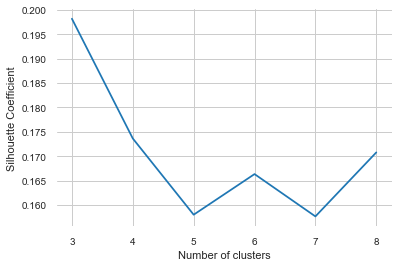

In [42]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

In [43]:
scores

[0.19815541185810104,
 0.1736172749857629,
 0.15798952867232022,
 0.1663160135075334,
 0.15763914403611726,
 0.17075654328526751]

In [44]:
telco_new.cluster_6.value_counts()/sum(telco_new.cluster_3.value_counts())

1    0.285
3    0.230
0    0.171
4    0.168
2    0.099
5    0.047
Name: cluster_6, dtype: float64

In [45]:
pd.Series.sort_index(telco_new.cluster_6.value_counts())

0    171
1    285
2     99
3    230
4    168
5     47
Name: cluster_6, dtype: int64

In [46]:
#Profiling
size=pd.concat([pd.Series(telco_new.cluster_3.size), pd.Series.sort_index(telco_new.cluster_3.value_counts()), pd.Series.sort_index(telco_new.cluster_4.value_counts()),
           pd.Series.sort_index(telco_new.cluster_5.value_counts()), pd.Series.sort_index(telco_new.cluster_6.value_counts()),
           pd.Series.sort_index(telco_new.cluster_7.value_counts()), pd.Series.sort_index(telco_new.cluster_8.value_counts())])

In [47]:
Seg_size=pd.DataFrame(size, columns=['Seg_size'])
Seg_Pct = pd.DataFrame(size/telco_new.cluster_3.size, columns=['Seg_Pct'])

In [48]:
pd.concat([Seg_size.T, Seg_Pct.T], axis=0)

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
Seg_size,1000.0,47.000,652.000,301.000,357.000,446.000,150.00,47.000,114.000,245.000,...,225.000,216.000,144.000,81.000,194.000,80.00,155.000,200.0,47.000,99.000
Seg_Pct,1.0,0.047,0.652,0.301,0.357,0.446,0.15,0.047,0.114,0.245,...,0.225,0.216,0.144,0.081,0.194,0.08,0.155,0.2,0.047,0.099


In [49]:
telco_new

,tenure,age,marital,address,income,ed,employ,retire,gender,reside,...,region_3,cust_cat_2,cust_cat_3,cust_cat_4,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8
0,13,44.0,1,9,64.00,4,5.0,0,0,2,...,0,0,0,0,1,1,3,0,4,5
1,11,33.0,1,7,136.00,5,5.0,0,0,6,...,1,0,0,1,2,1,1,3,2,1
2,68,52.0,1,24,116.00,1,29.0,0,1,2,...,1,0,1,0,1,2,0,1,5,2
3,33,33.0,0,12,33.00,2,0.0,0,1,1,...,0,0,0,0,1,1,4,0,4,2
4,23,30.0,1,9,30.00,1,2.0,0,0,4,...,0,0,1,0,1,1,3,0,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,10,39.0,0,0,27.00,3,0.0,0,1,3,...,1,0,0,0,1,1,4,1,2,2
996,7,34.0,0,2,22.00,5,5.0,0,1,1,...,0,0,0,0,1,1,4,1,5,2
997,67,59.0,0,40,460.48,5,33.0,0,1,1,...,1,0,0,1,2,2,0,2,3,3
998,70,49.0,0,18,87.00,2,22.0,0,1,1,...,1,0,1,0,2,2,1,3,5,2


In [50]:
# Mean value gives a good indication of the distribution of data. So we are finding mean value for each variable for each cluster
Profling_output = pd.concat([telco_new.apply(lambda x: x.mean()).T, telco_new.groupby('cluster_3').apply(lambda x: x.mean()).T, telco_new.groupby('cluster_4').apply(lambda x: x.mean()).T,
          telco_new.groupby('cluster_5').apply(lambda x: x.mean()).T, telco_new.groupby('cluster_6').apply(lambda x: x.mean()).T,
          telco_new.groupby('cluster_7').apply(lambda x: x.mean()).T, telco_new.groupby('cluster_8').apply(lambda x: x.mean()).T], axis=1)


In [51]:
Profling_output

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
tenure,35.526000,51.978723,33.929448,36.415282,30.190476,32.668161,51.566667,51.978723,51.236842,32.493878,...,35.360000,33.212963,47.937500,39.506173,25.365979,51.100000,31.038710,28.24500,51.978723,35.464646
age,41.645100,65.129574,40.216273,41.073090,37.725490,38.553834,52.806667,65.129574,53.912281,38.212245,...,42.226711,38.856481,41.145833,39.432099,37.484588,55.250000,38.741935,39.74000,65.129574,38.585859
marital,0.495000,0.319149,0.498466,0.514950,0.507003,0.502242,0.500000,0.319149,0.456140,0.514286,...,0.368889,0.518519,0.541667,0.777778,0.463918,0.450000,0.445161,0.44000,0.319149,0.565657
address,11.520000,24.191489,10.921779,10.837209,8.924370,10.163677,17.760000,24.191489,18.052632,9.179592,...,12.133333,9.259259,13.347222,10.197531,9.365979,17.925000,8.922581,9.81500,24.191489,10.484848
income,73.785700,37.593617,65.121166,98.205316,54.529412,48.127803,207.245333,37.593617,241.200000,59.244898,...,57.511111,62.055556,62.840278,69.296296,50.185567,279.985000,61.174194,51.12500,37.593617,55.707071
ed,2.671000,2.042553,2.444785,3.259136,3.372549,2.215247,2.553333,2.042553,2.578947,3.334694,...,2.204444,3.458333,2.444444,2.876543,2.329897,2.687500,3.587097,2.18000,2.042553,3.343434
employ,10.951100,23.213830,10.122730,10.830664,6.464986,8.378924,25.433667,23.213830,27.342544,7.338776,...,10.724444,7.333333,10.868056,10.851852,7.860825,29.088125,6.612903,8.92000,23.213830,7.626263
retire,0.047000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
gender,0.517000,0.638298,0.500000,0.534884,0.526611,0.491031,0.533333,0.638298,0.535088,0.526531,...,0.462222,0.513889,0.520833,0.456790,1.000000,0.575000,0.554839,0.00000,0.638298,0.494949
reside,2.323000,1.425532,2.294479,2.524917,2.456583,2.408072,2.033333,1.425532,1.894737,2.612245,...,1.635556,2.555556,2.388889,4.037037,2.335052,1.837500,2.096774,2.12500,1.425532,2.373737


In [52]:
Profling_output_final=pd.concat([Seg_size.T, Seg_Pct.T, Profling_output], axis=0)

In [53]:
#Profling_output_final.columns = ['Seg_' + str(i) for i in Profling_output_final.columns]
Profling_output_final.columns = ['Overall', 'KM3_1', 'KM3_2', 'KM3_3',
                                'KM4_1', 'KM4_2', 'KM4_3', 'KM4_4',
                                'KM5_1', 'KM5_2', 'KM5_3', 'KM5_4', 'KM5_5',
                                'KM6_1', 'KM6_2', 'KM6_3', 'KM6_4', 'KM6_5','KM6_6',
                                'KM7_1', 'KM7_2', 'KM7_3', 'KM7_4', 'KM7_5','KM7_6','KM7_7',
                                'KM8_1', 'KM8_2', 'KM8_3', 'KM8_4', 'KM8_5','KM8_6','KM8_7','KM8_8',]

In [54]:
Profling_output_final

,Overall,KM3_1,KM3_2,KM3_3,KM4_1,KM4_2,KM4_3,KM4_4,KM5_1,KM5_2,...,KM7_6,KM7_7,KM8_1,KM8_2,KM8_3,KM8_4,KM8_5,KM8_6,KM8_7,KM8_8
Seg_size,1000.000000,47.000000,652.000000,301.000000,357.000000,446.000000,150.000000,47.000000,114.000000,245.000000,...,225.000000,216.000000,144.000000,81.000000,194.000000,80.000000,155.000000,200.00000,47.000000,99.000000
Seg_Pct,1.000000,0.047000,0.652000,0.301000,0.357000,0.446000,0.150000,0.047000,0.114000,0.245000,...,0.225000,0.216000,0.144000,0.081000,0.194000,0.080000,0.155000,0.20000,0.047000,0.099000
tenure,35.526000,51.978723,33.929448,36.415282,30.190476,32.668161,51.566667,51.978723,51.236842,32.493878,...,35.360000,33.212963,47.937500,39.506173,25.365979,51.100000,31.038710,28.24500,51.978723,35.464646
age,41.645100,65.129574,40.216273,41.073090,37.725490,38.553834,52.806667,65.129574,53.912281,38.212245,...,42.226711,38.856481,41.145833,39.432099,37.484588,55.250000,38.741935,39.74000,65.129574,38.585859
marital,0.495000,0.319149,0.498466,0.514950,0.507003,0.502242,0.500000,0.319149,0.456140,0.514286,...,0.368889,0.518519,0.541667,0.777778,0.463918,0.450000,0.445161,0.44000,0.319149,0.565657
address,11.520000,24.191489,10.921779,10.837209,8.924370,10.163677,17.760000,24.191489,18.052632,9.179592,...,12.133333,9.259259,13.347222,10.197531,9.365979,17.925000,8.922581,9.81500,24.191489,10.484848
income,73.785700,37.593617,65.121166,98.205316,54.529412,48.127803,207.245333,37.593617,241.200000,59.244898,...,57.511111,62.055556,62.840278,69.296296,50.185567,279.985000,61.174194,51.12500,37.593617,55.707071
ed,2.671000,2.042553,2.444785,3.259136,3.372549,2.215247,2.553333,2.042553,2.578947,3.334694,...,2.204444,3.458333,2.444444,2.876543,2.329897,2.687500,3.587097,2.18000,2.042553,3.343434
employ,10.951100,23.213830,10.122730,10.830664,6.464986,8.378924,25.433667,23.213830,27.342544,7.338776,...,10.724444,7.333333,10.868056,10.851852,7.860825,29.088125,6.612903,8.92000,23.213830,7.626263
retire,0.047000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000


In [55]:
Profling_output_final.to_csv('Profling_output_final.csv')

#Predicting segment for new data

In [63]:
new_cust = pd.read_csv('Telco_new_cust.csv')

In [64]:
new_cust = pd.get_dummies(new_cust, columns=['region'], drop_first=True, prefix='region') #one hot encoding

new_cust = pd.get_dummies(new_cust, columns=['custcat'], drop_first=True, prefix='cust_cat') #one hot encoding

In [65]:
new_cust.drop(['wireless', 'equip'],axis=1, inplace=True)

In [66]:
telco_new.columns

Index(['tenure', 'age', 'marital', 'address', 'income', 'ed', 'employ',
       'retire', 'gender', 'reside', 'tollfree', 'callcard', 'multline',
       'voice', 'pager', 'internet', 'callid', 'callwait', 'forward', 'confer',
       'longmon', 'tollmon', 'equipmon', 'cardmon', 'wiremon', 'ebill',
       'region_2', 'region_3', 'cust_cat_2', 'cust_cat_3', 'cust_cat_4',
       'cluster_3', 'cluster_4', 'cluster_5', 'cluster_6', 'cluster_7',
       'cluster_8'],
      dtype='object')

In [67]:
new_cust.columns

Index(['tenure', 'age', 'marital', 'address', 'income', 'ed', 'employ',
       'retire', 'gender', 'reside', 'tollfree', 'callcard', 'multline',
       'voice', 'pager', 'internet', 'callid', 'callwait', 'forward', 'confer',
       'longmon', 'tollmon', 'equipmon', 'cardmon', 'wiremon', 'ebill',
       'region_2', 'region_3', 'cust_cat_2', 'cust_cat_3', 'cust_cat_4'],
      dtype='object')

In [68]:
#std_model = StandardScaler()
#std_model.fit(telco_new)
std_model.transform(new_cust)

array([[ 0.11588295,  1.07436785,  1.0100505 , ..., -0.52644013,
        -0.62515645,  1.79924655],
       [ 1.09952962, -1.25860863,  1.0100505 , ...,  1.89955124,
        -0.62515645, -0.5557882 ],
       [ 0.86532803,  1.07436785, -0.9900495 , ..., -0.52644013,
         1.59959959, -0.5557882 ],
       ...,
       [-1.47668785, -0.93681877, -0.9900495 , ..., -0.52644013,
        -0.62515645,  1.79924655],
       [ 1.70845375, -0.13234412,  1.0100505 , ...,  1.89955124,
        -0.62515645, -0.5557882 ],
       [ 0.39692485,  1.15481531, -0.9900495 , ..., -0.52644013,
         1.59959959, -0.5557882 ]])

In [72]:
telco_scaled1 = pd.DataFrame(std_model.transform(new_cust), columns = new_cust.columns)

In [71]:
selected_vars = ['tollmon',
'voice',
'employ',
'internet',
'multline',
'reside',
'region_2',
'income',
'retire',
'gender'
]

In [ ]:
input_segmentation = telco_scaled1[selected_vars]

In [ ]:
km_4.predict(final_input_segmentation)

In [ ]:
new_cust['segment'] = km_4.predict(final_input_segmentation)